<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [1]:
!pip install squarify

In [0]:
"""
Import Statements (I like how JC separated and described the purpose of
each biblioteca)
"""

# Base
from collections import Counter
import re
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")

In [4]:
# Load State of Unions (Thanks Matt)
data = 'https://raw.githubusercontent.com/mkirby1995/NLP/master/State_of_Unions.json'

df = pd.read_json(data)
df = df.sort_values(by = ['year'])

df.head()

,president,year,content
125,Washington,1790,
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...


In [0]:
df['content'] = df['content'].str.strip('\n')
df['content'] = df['content'].str.strip('\n\n')

In [30]:
df.isna().sum()

president    0
year         0
content      0
tokens       0
dtype: int64

# Tokenize from notes

In [0]:
# Tokenise
def tokenize(text):
  sample = re.sub(r'a-zA-Z ^0-9]', '', text)
  tokens = sample.lower().split()
  return tokens

In [0]:
df['tokens'] = df['content'].apply(tokenize)

In [37]:
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(5)

[('the', 149148), ('of', 96247), ('to', 60202), ('and', 59887), ('in', 38294)]

In [0]:
# Lecture notes code from JC
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [40]:
wc = count(df['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,the,227,149148,1.0,0.084552,0.084552,0.995614
550,of,227,96247,2.0,0.054563,0.139115,0.995614
157,to,227,60202,3.0,0.034129,0.173244,0.995614
499,and,227,59887,4.0,0.033950,0.207194,0.995614
752,in,227,38294,5.0,0.021709,0.228903,0.995614
812,a,227,27743,6.0,0.015728,0.244631,0.995614
387,that,227,21183,7.0,0.012009,0.256639,0.995614
388,for,227,18777,8.0,0.010645,0.267284,0.995614
442,be,227,18385,9.0,0.010423,0.277707,0.995614
329,our,227,17223,10.0,0.009764,0.287470,0.995614


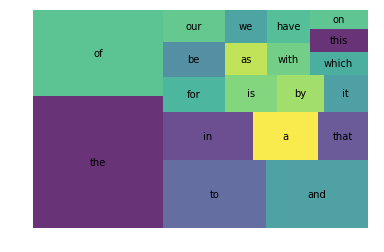

In [41]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Stop Words

In [47]:
type(nlp.Defaults.stop_words)

set

In [0]:
tokens = []

""" Update those tokens """
for doc in tokenizer.pipe(df['content'], batch_size=500):
    
    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
            
df['tokens'] = tokens

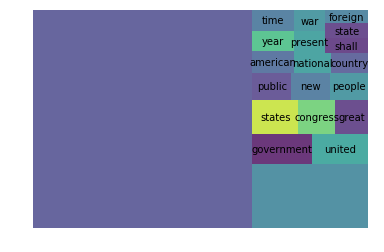

In [50]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Extending Stop Words

In [51]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\n', 'government', 'congress', 'united', 'states', "great", '\n\n', 'the', 'i'])

In [53]:
STOP_WORDS

{'\n',
 '\n\n',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'congress',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'for

In [0]:
tokens = []

for doc in tokenizer.pipe(df['content'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens


In [55]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,the,227,11580,1.0,0.013396,0.013396,0.995614
593,i,227,9097,2.0,0.010524,0.023920,0.995614
248,united,225,4657,3.0,0.005387,0.029307,0.986842
474,states,223,4321,4.0,0.004999,0.034306,0.978070
556,government,207,4058,5.0,0.004694,0.039000,0.907895


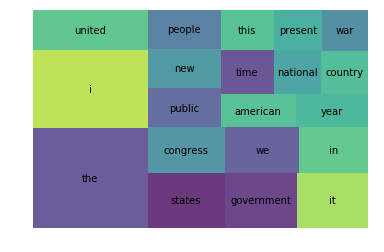

In [56]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [22]:
"""
Stop Words
Words such as "I", "and", "of", etc. have almost no semantic meaning to us. 
We call these useless words "stop words," because we should 'stop' ourselves 
from including them in the analysis.
"""

'\nStop Words\nWords such as "I", "and", "of", etc. have almost no semantic meaning to us. \nWe call these useless words "stop words," because we should \'stop\' ourselves \nfrom including them in the analysis.\n'

# Stemming 

In [0]:
ps = PorterStemmer()

In [0]:
df['stems'] = df['tokens']

In [0]:
def steminizer(series):
    
    stems = []
    
    for doc in tokenizer.pipe(series, batch_size=1000):
        
        doc_stems = []
        
        for token in doc:       
            #skip stops and punctuation
            if token.text not in STOP_WORDS:
                doc_stems.append(ps.stem(token.text.lower()))
        stems.append(doc_stems)
            
    return stems

In [0]:
df['stems'] = steminizer(df['content'])

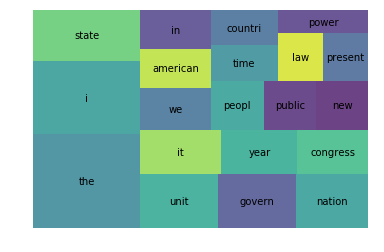

In [71]:
wc = count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Lemma

In [0]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
df['lemmas'] = df['content'].apply(get_lemmas)

In [0]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)